In [199]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [200]:
import tensorflow as tf
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

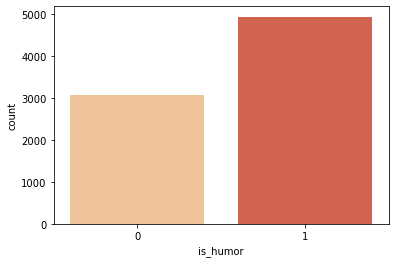

In [202]:
#Distribution of humor values
import seaborn as sns
sns.countplot(x='is_humor',data=dataset, palette="OrRd")

In [201]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:,1].values
#constant fill
from sklearn.impute import SimpleImputer 
constant_imputer=SimpleImputer(strategy='constant', fill_value=0)
dataset.iloc[:]=constant_imputer.fit_transform(dataset)
print(X)

Y = dataset.iloc[:,2].values
train_examples, test_examples, train_labels, test_labels = train_test_split(X,Y, test_size=0.2,random_state=0)
print(Y)

["TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit..."
 'A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step'
 'How many men does it take to open a can of beer? None. It should be open by the time she brings it to the couch.'
 ...
 'Today, we Americans celebrate our independence from Britain while planning our escape to Canada.'
 'How to keep the flies off the bride at an Italian wedding Keep a bucket of shit next to her'
 '"Each ounce of sunflower seeds gives you 37% of your daily need for vitamin E" vitamin health']
[1 1 1 ... 1 1 0]


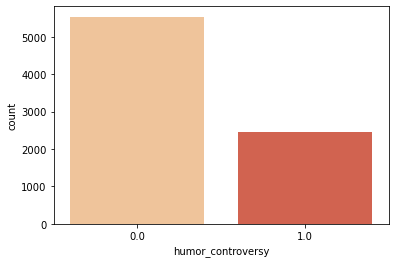

In [203]:
#Distribution of humor_controversy values
import seaborn as sns
sns.countplot(x='humor_controversy',data=dataset, palette="OrRd")

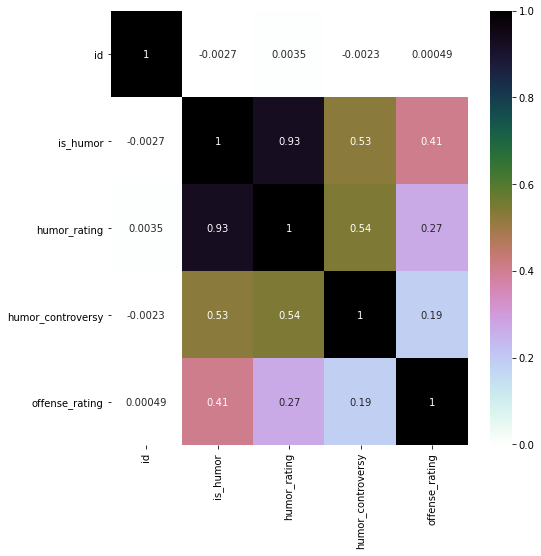

In [204]:
# Correlation of all the features in dataset
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')

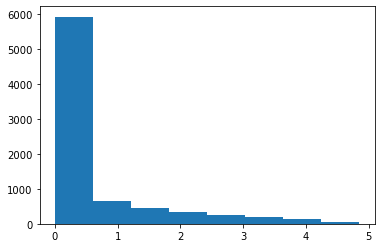

In [205]:
#Distribution of offense rating in dataset
import matplotlib.pyplot as plt

h = dataset.iloc[:,5].values
plt.hist(h, bins = 8)
plt.show()

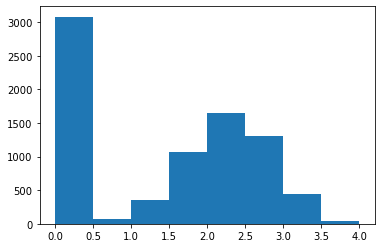

In [160]:
#Distribution of humor_rating in dataset
import matplotlib.pyplot as plt

h = dataset.iloc[:,3].values
plt.hist(h, bins = 8)
plt.show()

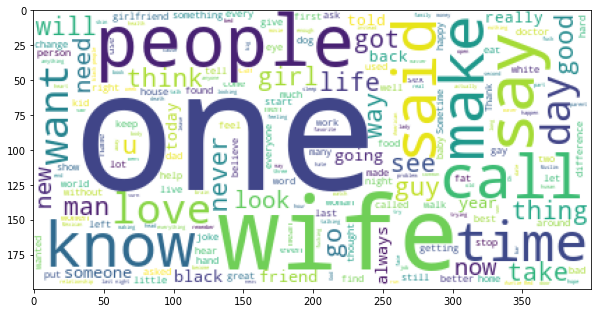

In [206]:
wc = WordCloud(background_color="white")
text = ''
for i in range (len(X)):
    text = text+ X[i]
plt.figure(figsize=(10,10))
wc.generate(text)
plt.axis("on")
plt.imshow(wc)
plt.show()

In [207]:
# Setting tokenizer properties
vocab_size = 50000
oov_tok = "<oov>"
# Fit the tokenizer on Training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_examples)

In [208]:
word_index = tokenizer.word_index
# Setting the padding properties
max_length = 500
trunc_type='post'
padding_type='post'

In [209]:
# Creating padded sequences from train and test data
training_sequences = tokenizer.texts_to_sequences(train_examples)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test_examples)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [210]:
# Setting the model parameters
embedding_dim = 300
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    #tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 500, 300)          15000000  
_________________________________________________________________
global_average_pooling1d_18  (None, 300)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_69 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 33        
Total params: 15,021,377
Trainable params: 15,021,377
Non-trainable params: 0
_________________________________________________________________


In [211]:
# Converting the lists to numpy arrays for Tensorflow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(train_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_labels)

In [212]:
print(len(training_padded))

6400


In [213]:
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
200/200 [==============================] - 22s 111ms/step - loss: 0.2364 - accuracy: 0.6158 - val_loss: 0.2330 - val_accuracy: 0.6194
Epoch 2/30
200/200 [==============================] - 23s 117ms/step - loss: 0.2122 - accuracy: 0.6536 - val_loss: 0.1716 - val_accuracy: 0.7794
Epoch 3/30
200/200 [==============================] - 23s 114ms/step - loss: 0.1258 - accuracy: 0.8269 - val_loss: 0.1213 - val_accuracy: 0.8325
Epoch 4/30
200/200 [==============================] - 23s 115ms/step - loss: 0.0891 - accuracy: 0.8827 - val_loss: 0.1109 - val_accuracy: 0.8369
Epoch 5/30
200/200 [==============================] - 24s 121ms/step - loss: 0.0710 - accuracy: 0.9066 - val_loss: 0.1204 - val_accuracy: 0.8275
Epoch 6/30
200/200 [==============================] - 24s 119ms/step - loss: 0.0518 - accuracy: 0.9339 - val_loss: 0.1023 - val_accuracy: 0.8594
Epoch 7/30
200/200 [==============================] - 24s 119ms/step - loss: 0.0401 - accuracy: 0.9509 - val_loss: 0.1264 - val_ac

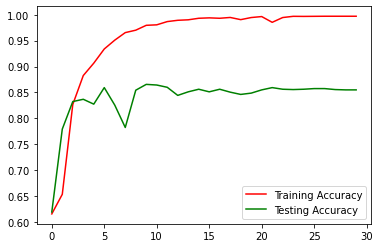

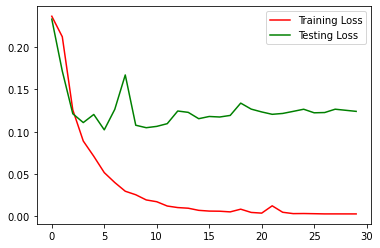

In [214]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [215]:
codalab_data = pd.read_csv('public_dev.csv')
test_data_codalab = codalab_data['text'].values
test_data_codalab

array(["What's the difference between a Bernie Sanders supporter and a fat stripper? A fat stripper actually gets to the polls.",
       "Vodka, whisky, tequila. I'm calling the shots.",
       "French people don't masturbate They Jacque off",
       "A lot of Suicide bombers are Muslims - I don't blame them... I too would kill myself if I was a Muslim.",
       'What happens when you fingerbang a gypsy on her period? You get your palm red.',
       "Who's the biggest slut ever? Mrs. Pacman--for 25 cents that bitch swallowed balls till she died.",
       'Caught a tall black man looking through my window today. I knew he was tall because I live on the 2nd floor.',
       "A6: It CAN be, but it doesn't have to be. It depends on the circumstances and your partner's attitude to fixing debt. love and money",
       'Parenting Takes Mom and Dad.. So why do we humans insist on bucking nature? Successful parenting takes two -- mom and dad. parenting family',
       "Ok folks-I'm gonna try thi

In [ ]:
#for i in range(len(test_data_codalab)):
 #   print(test_data_codalab[i])
  #  test_data_codalab[i] = remove_stopwords(test_data_codalab[i].lower())
   # print(test_data_codalab[i])

In [217]:
sequences = tokenizer.texts_to_sequences(test_data_codalab)
# print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
humor = model.predict_classes(padded)
for i in range(len(humor)):
    print(humor[i][0])

1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
1
1
1
1
0
0
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
1
0
1
1
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
0
0
0
0
1
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
0
0
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
